In [237]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 20, 8
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import sklearn

In [238]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [239]:
df = pd.read_excel('data.xlsx')
print(df.columns)


Index(['Borrower ID', 'Loan ID', 'Credit score', 'Loan amount', 'Disbursal date', 'Interest rate', 'Loan term', 'Borrower type', 'Loan type', 'Repayment date', 'Expected repayment date', 'Loan status', 'Days late', 'default', 'Purpose', 'Monthly payment', 'Outstanding principal', 'Repaid principal', 'Outstanding interest', 'Repaid interest', 'Delay interest', 'Arrears', 'Birth year', 'Gender', 'City', 'Marital status', 'Children', 'Residential status', 'Education', 'Occupation', 'Months at current employer', 'Years working total', 'Employment status', 'DTI', 'Family liabilities', 'Family income', 'Borrower income', 'Borrower liabilities', 'Spouse income', 'Spouse liabilities', 'Last debt payment date'], dtype='object')


In [240]:
df.head()

,Borrower ID,Loan ID,Credit score,Loan amount,Disbursal date,Interest rate,Loan term,Borrower type,Loan type,Repayment date,Expected repayment date,Loan status,Days late,default,Purpose,Monthly payment,Outstanding principal,Repaid principal,Outstanding interest,Repaid interest,Delay interest,Arrears,Birth year,Gender,City,Marital status,Children,Residential status,Education,Occupation,Months at current employer,Years working total,Employment status,DTI,Family liabilities,Family income,Borrower income,Borrower liabilities,Spouse income,Spouse liabilities,Last debt payment date
0,U-00000382,L-00000001,A,3000,2015-08-17,20.96,12,fizinis asmuo,kasmėnesinės įmokos,2016-02-04,2016-01-31,grąžinta,0,0,namų remontui,271.39,0.0,3000.0,0.0,256.62,NaN,NaN,1991,moteris,Vilnius,nevedęs/netekėjusi,0,nuosavas,pagrindinis,Eksporto vadybininkė / Export manager,18,NaN,"dirba, pilnu etatu",34,0.0,800.0,NaN,NaN,NaN,NaN,NaT
1,U-00000405,L-00000002,C,2700,2015-08-28,25.82,54,fizinis asmuo,kasmėnesinės įmokos,2020-02-27,2020-02-27,grąžinta,0,0,paskolų refinansavimui,85.03,0.0,2700.0,0.0,1891.64,NaN,NaN,1985,moteris,Vilnius,nevedęs/netekėjusi,0,nuomojamas,magistras,Specialistė / Specialist,60,NaN,"dirba, pilnu etatu",13,0.0,590.0,NaN,NaN,NaN,NaN,NaT
2,U-00000408,L-00000003,D,1300,2015-08-20,25.25,24,fizinis asmuo,kasmėnesinės įmokos,2016-10-31,2016-10-31,grąžinta,0,0,kita,66.46,0.0,1300.0,0.0,294.96,NaN,NaN,1989,vyras,Kaunas,nevedęs/netekėjusi,0,nuomojamas,magistras,Inžinierius-projektuotojas,9,NaN,"dirba, pilnu etatu",16,14.0,510.0,NaN,NaN,NaN,NaN,NaT
3,U-00000528,L-00000028,C,2000,2015-08-21,25.83,27,fizinis asmuo,kasmėnesinės įmokos,2016-09-30,2016-09-30,grąžinta,0,0,paskolų refinansavimui,91.07,0.0,2000.0,0.0,458.90,NaN,NaN,1983,moteris,Šilutė,nevedęs/netekėjusi,0,gyvena su tėvais,magistras,Valstybės tarnautoja/Public servant,48,NaN,"dirba, pilnu etatu",25,127.0,900.0,NaN,NaN,NaN,NaN,NaT
4,U-00000545,L-00000038,D,2250,2015-08-25,31.56,18,fizinis asmuo,kasmėnesinės įmokos,2017-03-13,2017-02-25,grąžinta,0,0,paskolų refinansavimui,158.52,0.0,2250.0,0.0,603.37,7.92,NaN,1979,moteris,"Trakų rajonas, Bražuolės kaimas",susituokęs(-usi),2,gyvena su tėvais,pagrindinis,Barmenė,72,NaN,"dirba, pilnu etatu",36,0.0,420.0,NaN,NaN,NaN,NaN,NaT


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17881 entries, 0 to 17880
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Borrower ID                 17881 non-null  object        
 1   Loan ID                     17881 non-null  object        
 2   Credit score                17881 non-null  object        
 3   Loan amount                 17881 non-null  int64         
 4   Disbursal date              17881 non-null  datetime64[ns]
 5   Interest rate               17881 non-null  float64       
 6   Loan term                   17881 non-null  int64         
 7   Borrower type               17881 non-null  object        
 8   Loan type                   17881 non-null  object        
 9   Repayment date              11654 non-null  datetime64[ns]
 10  Expected repayment date     17881 non-null  datetime64[ns]
 11  Loan status                 17881 non-null  object    

In [242]:
#Triname nelogiškus/neteisingus duomenis
df['Months at current employer'].sort_values(ascending=True).head(100)
df = df[df['Months at current employer'] >= 4]  
#Pašaliname labai mažą kiekį labai gerai įvertintų klientų
df['Credit score'].value_counts()
df = df[df['Credit score'] != 'A+']
#Nutriname tris paskolas su neaiškiu tikslu.
df = df[df.Purpose != 'loan_purpose.27']
#Pašaliname kelis klientus su pažymėtais dideliais kiekiais vaikų
df['Children'].value_counts()
df = df[df.Children != 5]
df = df[df.Children != 6]
df = df[df.Children != 7]
df = df[df.Children != 8]
#Pašaliname išskirtis darbo staže
df['Years working total'].value_counts()
df = df[df['Years working total'] != 55]
df = df[df['Years working total'] != 50]
df = df[df['Years working total'] != 48]
df = df[df['Years working total'] != 46]
df = df[df['Years working total'] != 44]

In [243]:
#Lyčių beveik po lygiai
df['Gender'].value_counts()

moteris    8088
vyras      7488
Name: Gender, dtype: int64

In [244]:
#Vedybinis statusas pasiskirstęs pakankamai gerai
df['Marital status'].value_counts()

susituokęs(-usi)      5615
nevedęs/netekėjusi    5023
išsiskyręs(-usi)      2692
kita                  2249
Name: Marital status, dtype: int64

In [245]:
#Išskirčių prie išsilavinimo nėra
df['Education'].value_counts()

aukštasis      5969
profesinis     5524
pagrindinis    3049
magistras      1037
Name: Education, dtype: int64

In [246]:
#Pašaliname išskirtis iš gimimo metų.
df = df[df['Birth year'] != 1948]
df = df[df['Birth year'] != 1949]
df = df[df['Birth year'] != 1950]

In [247]:
df['Family income'].value_counts(bins=10)
#df['Borrower income'].sort_values(ascending = False)

(-9.468, 946.703]       10897
(946.703, 1893.406]      3859
(1893.406, 2840.109]      610
(2840.109, 3786.812]      132
(3786.812, 4733.515]       41
(5680.218, 6626.921]       11
(6626.921, 7573.624]       10
(4733.515, 5680.218]        8
(7573.624, 8520.327]        3
(8520.327, 9467.03]         2
Name: Family income, dtype: int64

In [248]:
#Pašaliname išskirtis atlyginimuose
df = df[df['Borrower income'].notnull()]
df = df[df['Borrower income'] != 12.1689]
df = df[df['Borrower income'] <= 2500]  
df = df[df['Family income'] > 0]  
df['Family income'].sort_values(ascending = False)

14118    5843.7300
14312    5587.2300
17580    4624.9700
10606    4267.1000
12410    4147.7600
           ...    
15537     181.6000
6230      171.6601
11703     171.0000
11268     127.0000
8724      112.8513
Name: Family income, Length: 7956, dtype: float64

In [249]:
#Pašaliname išskirtis iš DTI kriterijaus
df['DTI'].sort_values(ascending = False)
df = df[df['DTI'] != 109]
df = df[df['DTI'] != 62]

In [250]:
#Pašaliname išskirtis iš darbo statuso
df['Employment status'].value_counts()
df = df[df['Employment status'] != 'bedarbis']
df = df[df['Employment status'] != 'pensininkas']
df = df[df['Employment status'] != 'studentas']
df['Employment status'].value_counts()

dirba, pilnu etatu      7775
dirba, nepilnu etatu      88
individuali veikla        85
Name: Employment status, dtype: int64

In [251]:
#Pašaliname miestus kurių tik po vieną.
value_counts = df['City'].value_counts()
to_remove = value_counts[value_counts <= 1].index
df = df[~df['City'].isin(to_remove)]

In [252]:
#Sutvarkome įsipareigojimų duomenis
df['Borrower liabilities'].sort_values(ascending = False)
df['Borrower liabilities'] = df['Borrower liabilities'].fillna(0)

In [253]:
dataa = df[["Borrower ID", "Credit score", "Loan amount", "Interest rate", "Loan term", "default", "Purpose", "Monthly payment", "Birth year", "Gender", "City", "Marital status", "Children", "Residential status", "Education", "Months at current employer", "DTI", "Family income", "Family liabilities", "Borrower income", "Borrower liabilities"]]

In [254]:
dataa

,Borrower ID,Credit score,Loan amount,Interest rate,Loan term,default,Purpose,Monthly payment,Birth year,Gender,City,Marital status,Children,Residential status,Education,Months at current employer,DTI,Family income,Family liabilities,Borrower income,Borrower liabilities
153,U-00002597,B,1640,23.49,33,0,kita,70.96,1991,vyras,NaN,nevedęs/netekėjusi,0,nuosavas,aukštasis,62,35,1610.5197,0.00,1610.5197,0.00
227,U-00003079,A,6000,22.53,66,0,namų remontui,161.36,1981,moteris,Vilnius,išsiskyręs(-usi),2,nuosavas,pagrindinis,4,18,1261.5074,0.00,1261.5074,0.00
1030,U-00007926,B,3080,21.05,48,1,paskolų refinansavimui,105.26,1964,moteris,Panevėžys,susituokęs(-usi),0,nuosavas,profesinis,71,21,915.7617,0.00,915.7617,0.00
1062,U-00008093,D,2100,24.95,45,1,namų remontui,77.24,1964,moteris,Druskininkai,susituokęs(-usi),0,nuosavas,profesinis,24,30,711.6840,0.00,711.6840,0.00
1107,U-00008375,B,4200,22.84,48,1,paskolų refinansavimui,147.82,1957,moteris,Kuršėnai,susituokęs(-usi),0,nuosavas,profesinis,204,31,1166.9114,0.00,1166.9114,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17873,U-29572286,B,4350,14.00,24,0,kita,221.24,1972,vyras,Kaunas,susituokęs(-usi),0,nuosavas,aukštasis,186,36,1231.2600,220.59,833.2600,87.00
17874,U-39398471,B,2175,15.00,24,0,automobiliui,110.96,1970,moteris,Pakruojo r.,išsiskyręs(-usi),0,nuosavas,profesinis,15,26,431.4300,0.00,431.4300,0.00
17877,U-15352595,D,4200,25.00,60,0,paskolų refinansavimui,125.24,1981,moteris,Švenčionėliai,nevedęs/netekėjusi,3,nuomojamas,profesinis,20,22,580.7200,0.00,580.7200,0.00
17878,U-99566421,D,3745,23.00,54,0,paskolų refinansavimui,117.55,1998,vyras,Joniškio r.,kita,0,gyvena su tėvais,profesinis,7,31,1148.8800,241.95,1148.8800,241.95


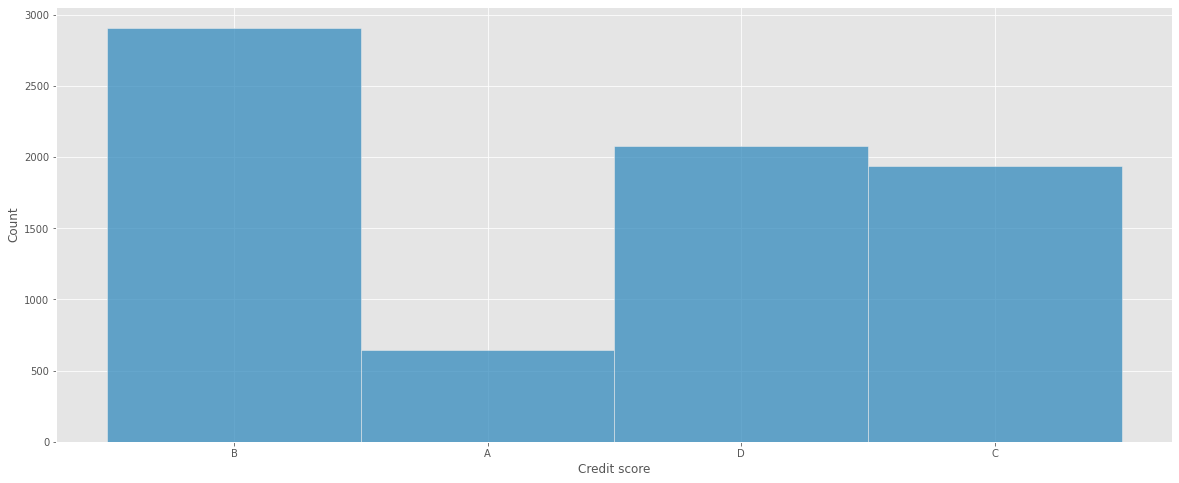

In [255]:
sns.histplot(x='Credit score', data=dataa);


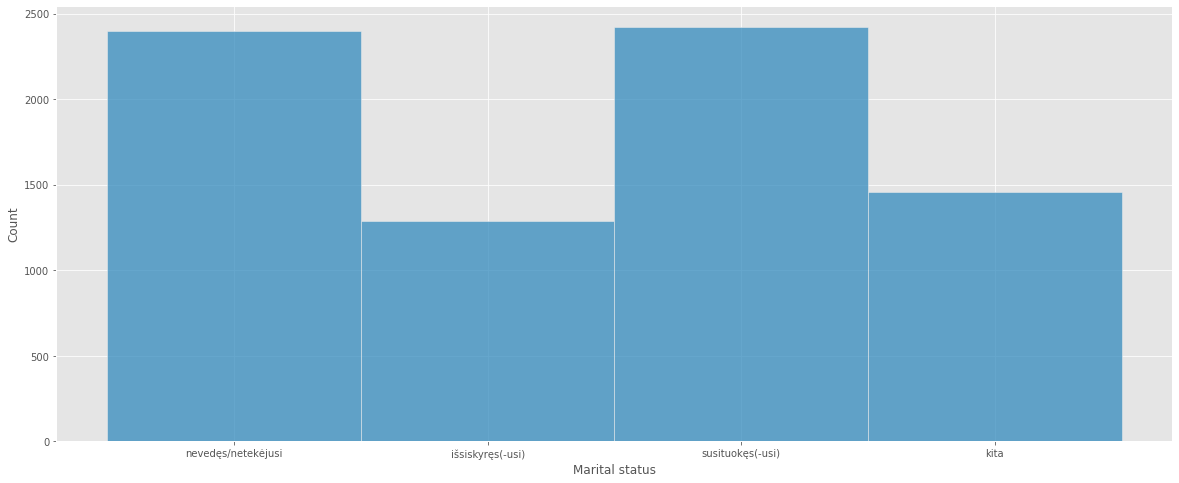

In [256]:
sns.histplot(x='Marital status', data=dataa);

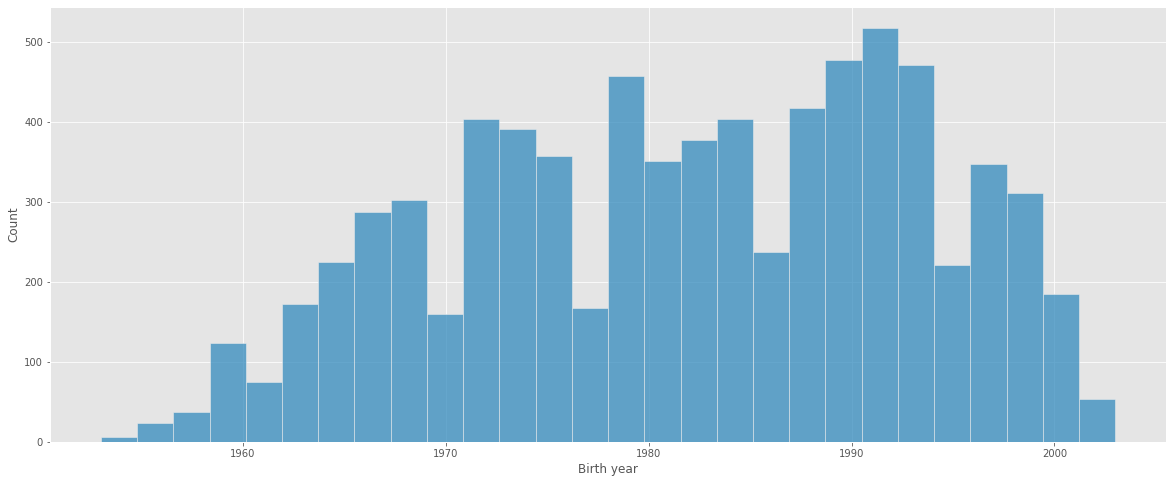

In [257]:

sns.histplot(x='Birth year', data=dataa);

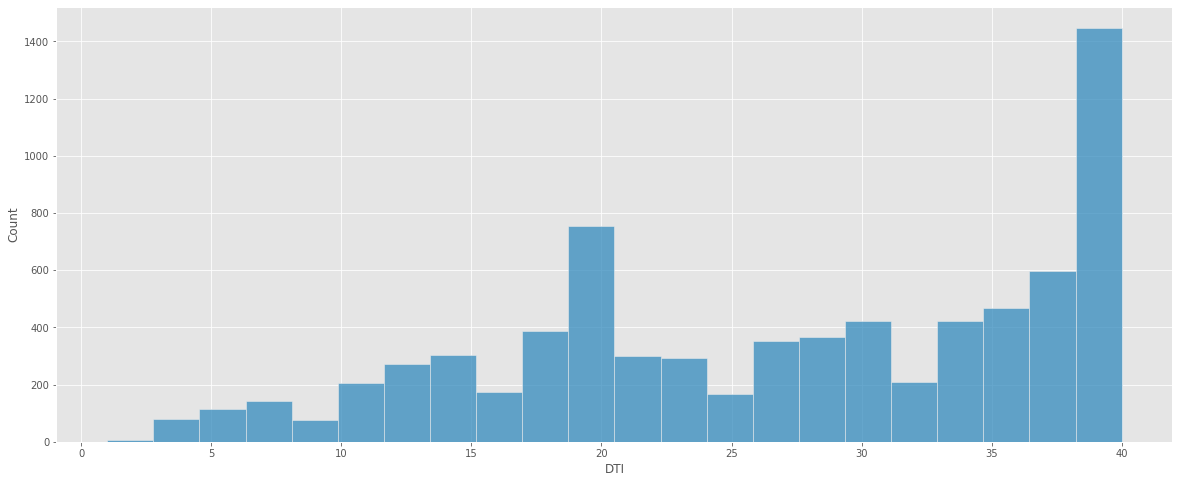

In [258]:

sns.histplot(x='DTI', data=dataa);

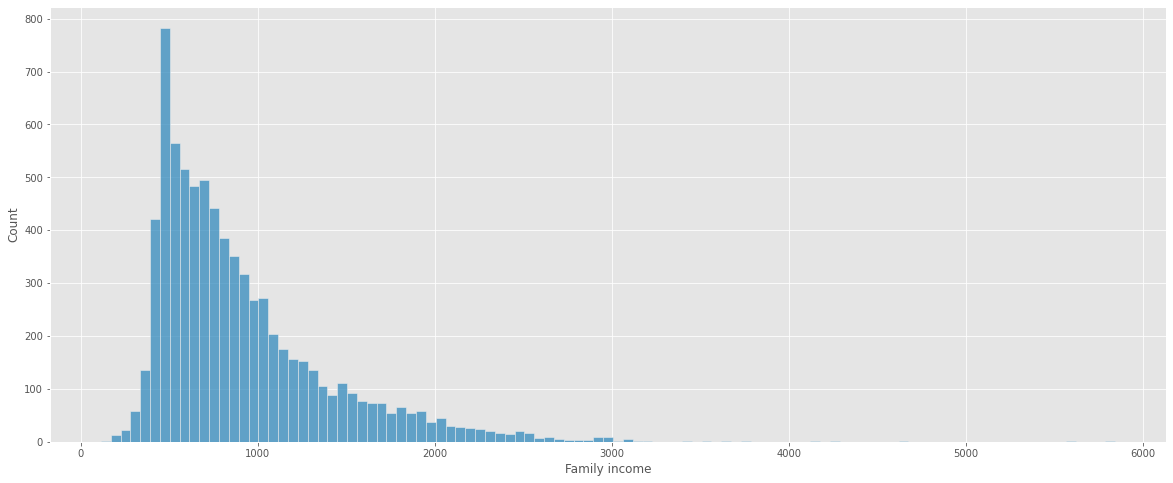

In [259]:

sns.histplot(x='Family income', data=dataa);

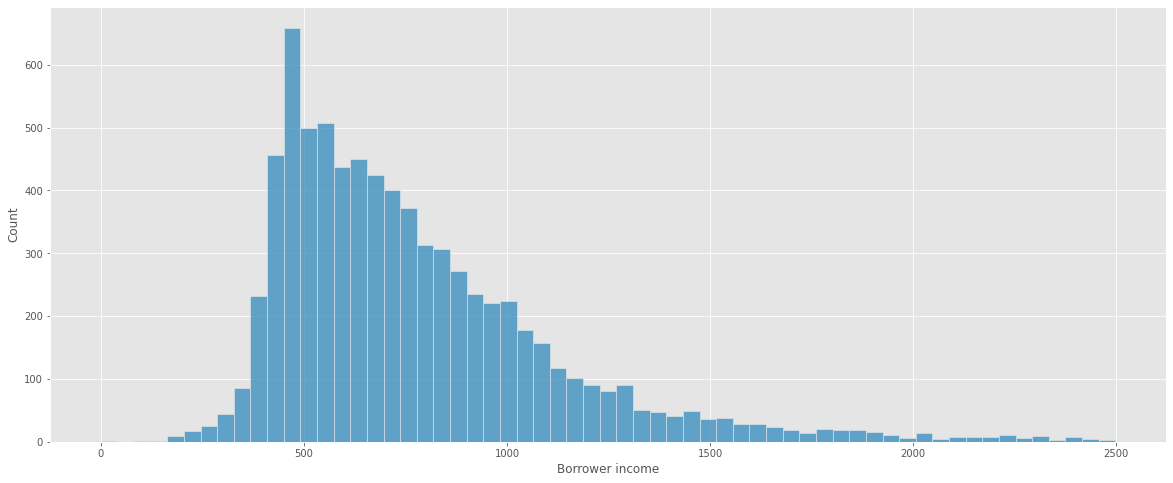

In [260]:

sns.histplot(x='Borrower income', data=dataa);

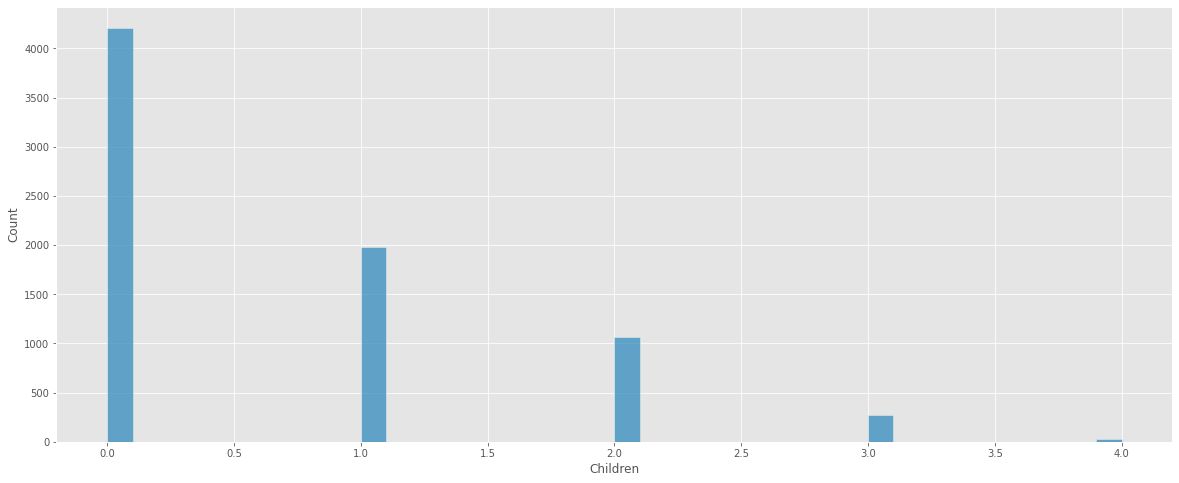

In [261]:
sns.histplot(x="Children", data=dataa);


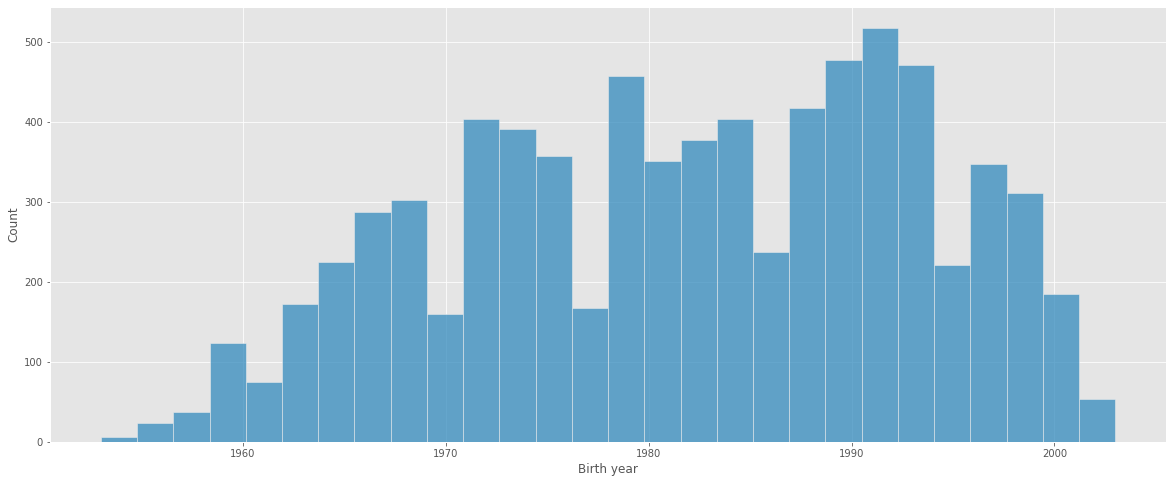

In [262]:
sns.histplot(x='Birth year', data=dataa);

In [263]:

corr = dataa.corr()
corr.style.background_gradient(cmap='coolwarm')

,Loan amount,Interest rate,Loan term,default,Monthly payment,Birth year,Children,Months at current employer,DTI,Family income,Family liabilities,Borrower income,Borrower liabilities
Loan amount,1.000000,-0.053715,0.604211,0.010519,0.848082,-0.065440,0.013066,0.057878,0.341645,0.141421,-0.123542,0.186161,-0.159468
Interest rate,-0.053715,1.000000,0.099543,0.199144,-0.033208,0.388628,0.043639,-0.212674,0.101103,-0.162331,-0.062193,-0.119024,-0.047781
Loan term,0.604211,0.099543,1.000000,0.026324,0.258748,-0.034899,0.042769,0.012824,0.325704,-0.018524,0.028640,0.005689,0.023286
default,0.010519,0.199144,0.026324,1.000000,0.028235,0.070015,-0.007661,-0.076853,0.015532,-0.070809,-0.077886,-0.055358,-0.073607
Monthly payment,0.848082,-0.033208,0.258748,0.028235,1.000000,-0.034941,-0.006470,0.042976,0.294073,0.166698,-0.164016,0.216731,-0.201863
Birth year,-0.065440,0.388628,-0.034899,0.070015,-0.034941,1.000000,0.063171,-0.418041,-0.059855,-0.129743,-0.113183,-0.041701,-0.092581
Children,0.013066,0.043639,0.042769,-0.007661,-0.006470,0.063171,1.000000,-0.012792,-0.019670,0.121651,0.097628,0.042832,0.063951
Months at current employer,0.057878,-0.212674,0.012824,-0.076853,0.042976,-0.418041,-0.012792,1.000000,0.076093,0.195792,0.179640,0.147184,0.167045
DTI,0.341645,0.101103,0.325704,0.015532,0.294073,-0.059855,-0.019670,0.076093,1.000000,-0.010569,0.401893,-0.009519,0.403383
Family income,0.141421,-0.162331,-0.018524,-0.070809,0.166698,-0.129743,0.121651,0.195792,-0.010569,1.000000,0.719600,0.750455,0.599875


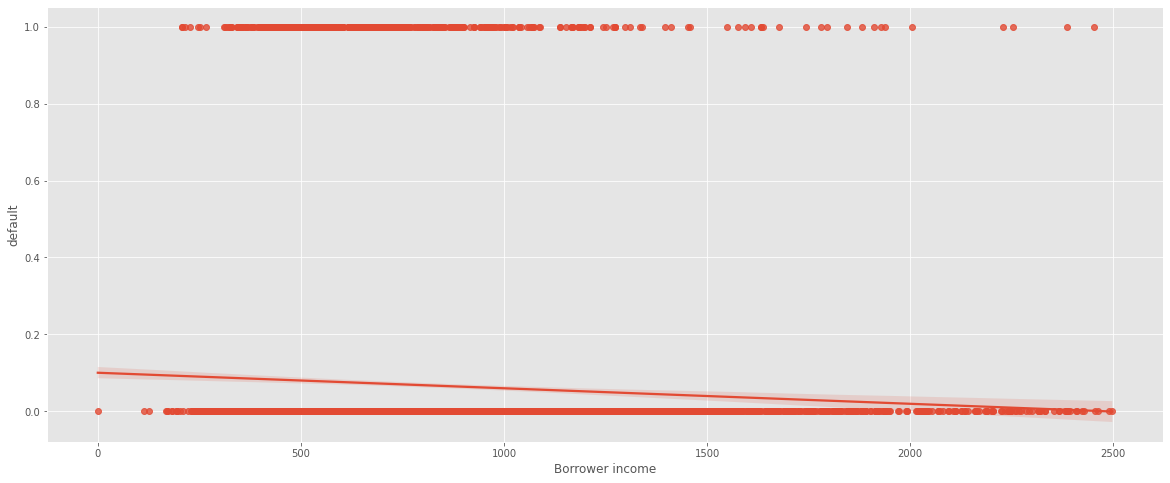

In [264]:
import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(x=dataa["Borrower income"], y=df["default"]);


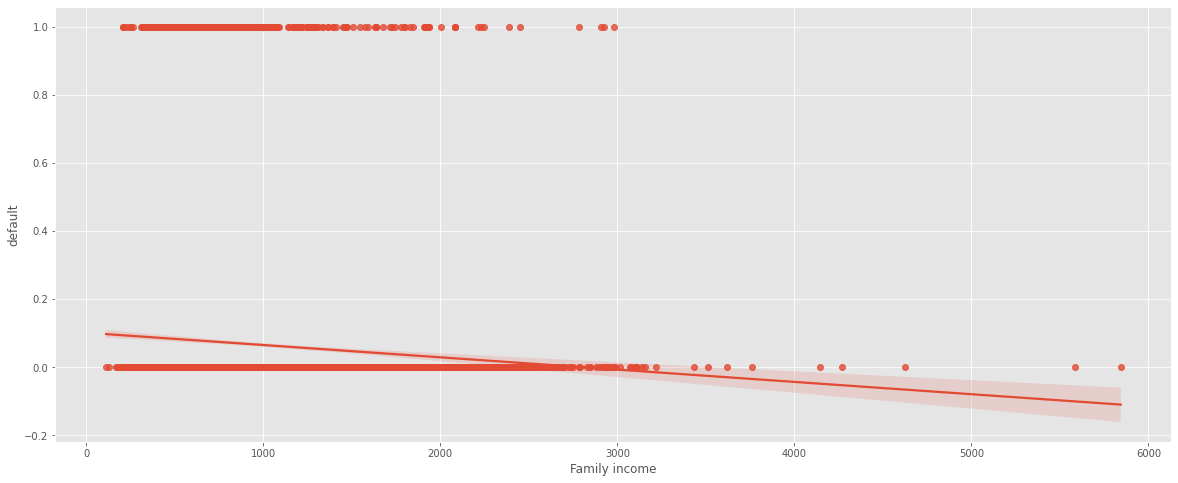

In [265]:
sns.regplot(x=dataa["Family income"], y=df["default"]);

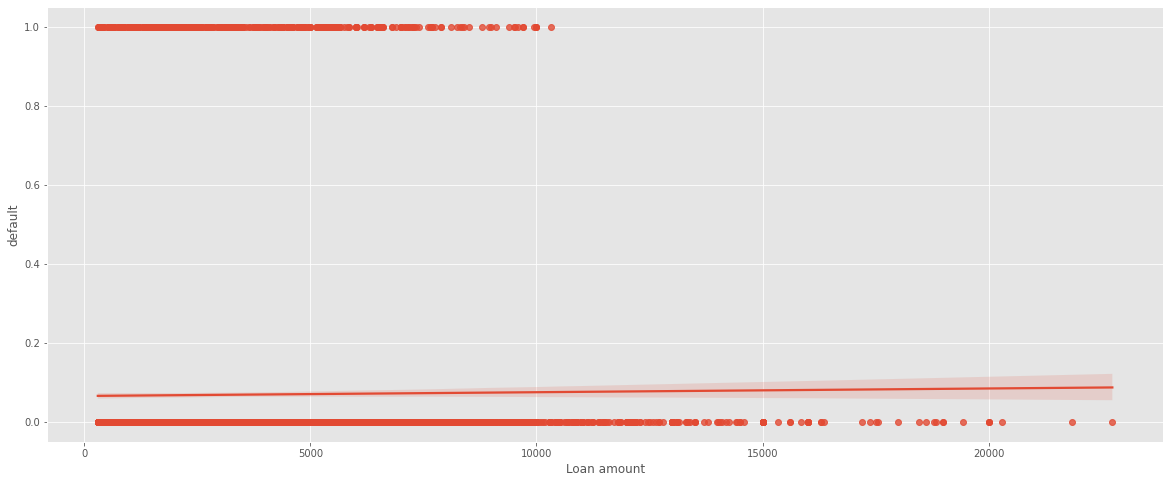

In [266]:
sns.regplot(x=dataa["Loan amount"], y=df["default"]);

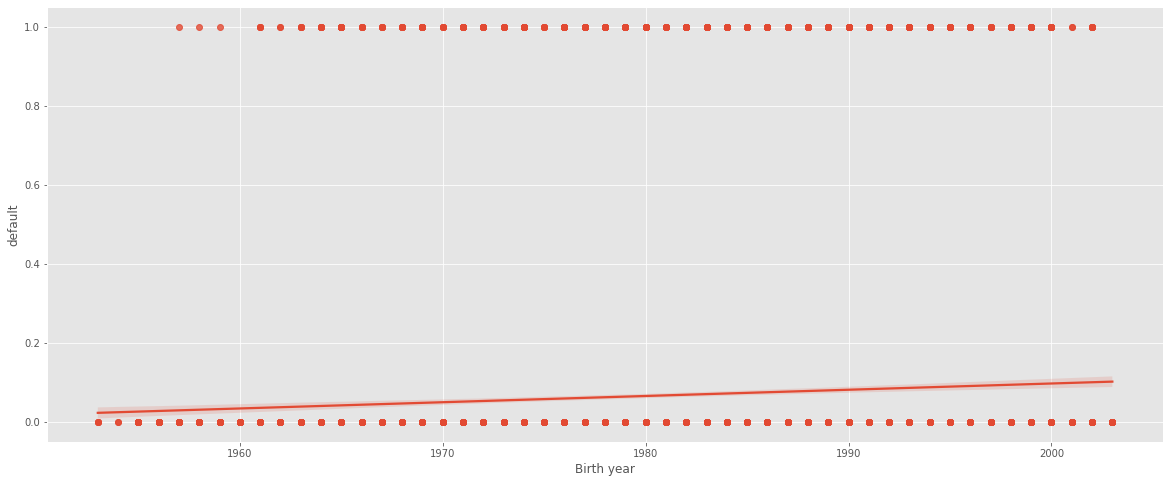

In [267]:
sns.regplot(x=dataa["Birth year"], y=df["default"]);

In [268]:
dataa.describe()

,Loan amount,Interest rate,Loan term,default,Monthly payment,Birth year,Children,Months at current employer,DTI,Family income,Family liabilities,Borrower income,Borrower liabilities
count,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000,7562.000000
mean,3111.555144,18.404984,40.073393,0.068897,113.086496,1981.898043,0.667681,53.124967,27.027903,904.313515,130.660385,773.012659,108.640465
std,2813.839788,5.041600,21.139745,0.253296,81.780069,11.232148,0.876585,62.533909,10.369749,496.808621,160.939563,347.404291,133.312030
min,300.000000,7.000000,3.000000,0.000000,6.530000,1953.000000,0.000000,4.000000,1.000000,112.851300,0.000000,0.000000,0.000000
25%,1055.000000,14.000000,24.000000,0.000000,51.832500,1973.000000,0.000000,12.000000,19.000000,545.542500,0.000000,520.437500,0.000000
50%,2200.000000,17.000000,36.000000,0.000000,97.120000,1983.000000,0.000000,29.000000,28.000000,759.685000,77.000000,689.930000,62.680000
75%,4400.000000,23.000000,60.000000,0.000000,154.660000,1991.000000,1.000000,69.000000,37.000000,1092.002500,201.190000,925.655000,173.062500
max,22735.000000,33.000000,84.000000,1.000000,1248.380000,2003.000000,4.000000,384.000000,40.000000,5843.730000,1307.070000,2498.000000,994.000000


In [269]:
#Sukuriam kintamuosius X ir y
X = dataa.drop(['default', 'Borrower ID', 'Credit score', 'Interest rate', 'Monthly payment', 'City', 'DTI'], axis = 1)
y = dataa['default']

In [270]:
#Sukuriam dummy kintamuosius
X = pd.get_dummies(X, columns=['Gender', 'Education', 'Marital status', 'Purpose', 'Residential status'])
X

,Loan amount,Loan term,Birth year,Children,Months at current employer,Family income,Family liabilities,Borrower income,Borrower liabilities,Gender_moteris,Gender_vyras,Education_aukštasis,Education_magistras,Education_pagrindinis,Education_profesinis,Marital status_išsiskyręs(-usi),Marital status_kita,Marital status_nevedęs/netekėjusi,Marital status_susituokęs(-usi),Purpose_atostogoms,Purpose_automobiliui,Purpose_kita,Purpose_medicininėms išlaidoms,Purpose_namų remontui,Purpose_paskolų refinansavimui,Purpose_verslui,Residential status_gyvena su tėvais,Residential status_kita,Residential status_nuomojamas,Residential status_nuosavas
153,1640,33,1991,0,62,1610.5197,0.00,1610.5197,0.00,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
227,6000,66,1981,2,4,1261.5074,0.00,1261.5074,0.00,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1030,3080,48,1964,0,71,915.7617,0.00,915.7617,0.00,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1062,2100,45,1964,0,24,711.6840,0.00,711.6840,0.00,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1107,4200,48,1957,0,204,1166.9114,0.00,1166.9114,0.00,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17873,4350,24,1972,0,186,1231.2600,220.59,833.2600,87.00,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
17874,2175,24,1970,0,15,431.4300,0.00,431.4300,0.00,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
17877,4200,60,1981,3,20,580.7200,0.00,580.7200,0.00,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
17878,3745,54,1998,0,7,1148.8800,241.95,1148.8800,241.95,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


In [271]:
#Paskaičiuojame y reikšmes, kad pamatytume, jog duomenys labai išbalansuoti
y.value_counts()

0    7041
1     521
Name: default, dtype: int64

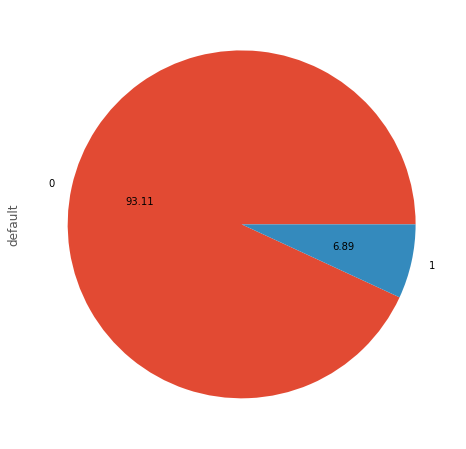

In [272]:
#Pamatome duomenų pasiskirstymą
y.value_counts().plot.pie(autopct='%.2f');

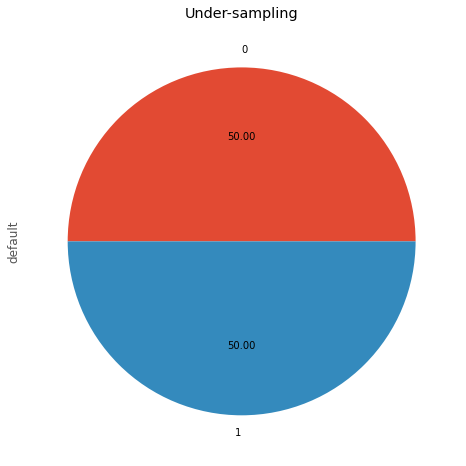

In [273]:
#Darome UnderSampler, pamazinam majority dali
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)
X_rez, y_rez = rus.fit_resample(X, y)
ax = y_rez.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [274]:
#Dabar turime mazai abieju
y_rez.value_counts()

0    521
1    521
Name: default, dtype: int64

Oversampling

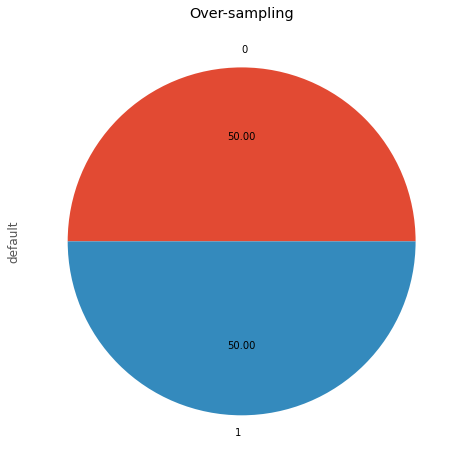

In [276]:
#Turime daugiau reiksmiu ir po lygiai
y_res.value_counts()

0    7041
1    7041
Name: default, dtype: int64

### Logistic regression

In [277]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


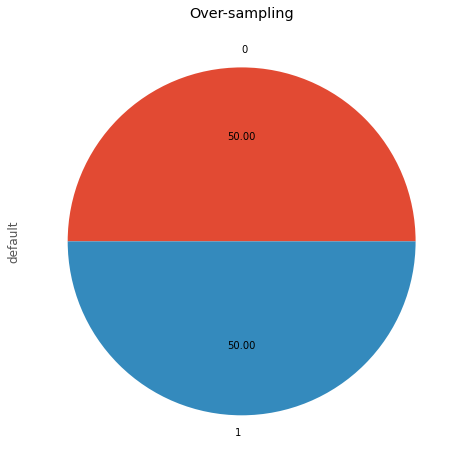

In [278]:
#Sukuriame train ir test setus
#Naudojame undersampling duomenis
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10)
from imblearn.over_sampling import RandomOverSampler


#Train duomenys pafitinam ir transformuojam, o test tik transformuojam
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

ros = RandomOverSampler(sampling_strategy = "not majority")
X_Train_res, y_Train_res = ros.fit_resample(X_train_scaled, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [279]:
#Fitinam modeli
log_reg = LogisticRegression()
log_reg.fit(X_Train_res, y_Train_res)

LogisticRegression()

In [280]:
y_pred = log_reg.predict(x_test_scaled)

In [281]:
#Sukuriame confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

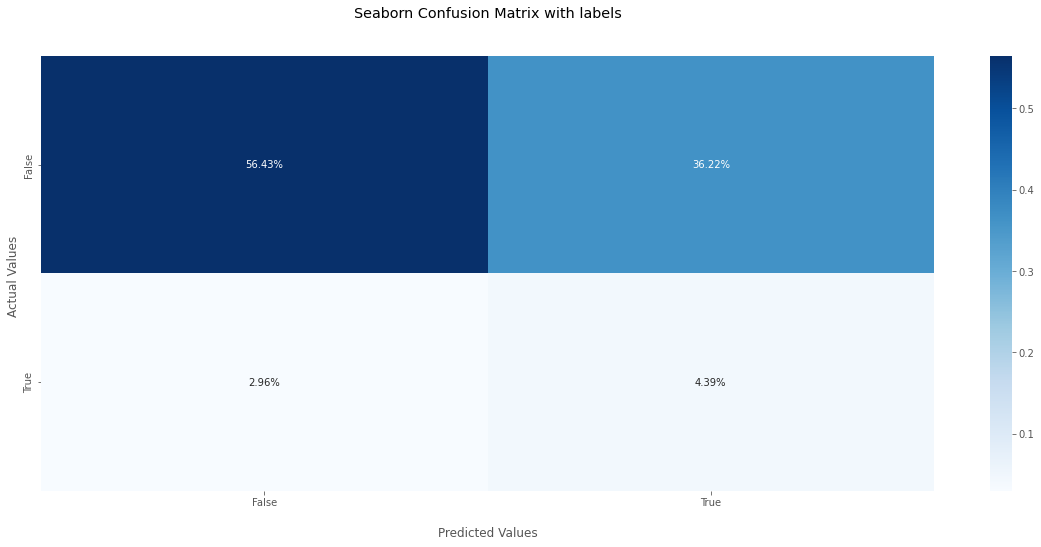

In [282]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [283]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)



Accuracy: 0.608144
Precision: 0.108073
Recall: 0.597122
F1 score: 0.183021


In [284]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.603070283499228

Feature: 0, Score: -0.12267
Feature: 1, Score: 0.26305
Feature: 2, Score: -0.10538
Feature: 3, Score: -0.00982
Feature: 4, Score: -0.23881
Feature: 5, Score: 0.13783
Feature: 6, Score: -0.13959
Feature: 7, Score: -0.16961
Feature: 8, Score: -0.16411
Feature: 9, Score: -0.10914
Feature: 10, Score: 0.10914
Feature: 11, Score: 0.05580
Feature: 12, Score: -0.09440
Feature: 13, Score: -0.12247
Feature: 14, Score: 0.08852
Feature: 15, Score: 0.00384
Feature: 16, Score: -0.02125
Feature: 17, Score: 0.12640
Feature: 18, Score: -0.11111
Feature: 19, Score: -0.04175
Feature: 20, Score: -0.10159
Feature: 21, Score: 0.03255
Feature: 22, Score: -0.13004
Feature: 23, Score: 0.00348
Feature: 24, Score: 0.06313
Feature: 25, Score: 0.06531
Feature: 26, Score: 0.10153
Feature: 27, Score: -0.06857
Feature: 28, Score: 0.10951
Feature: 29, Score: -0.13657


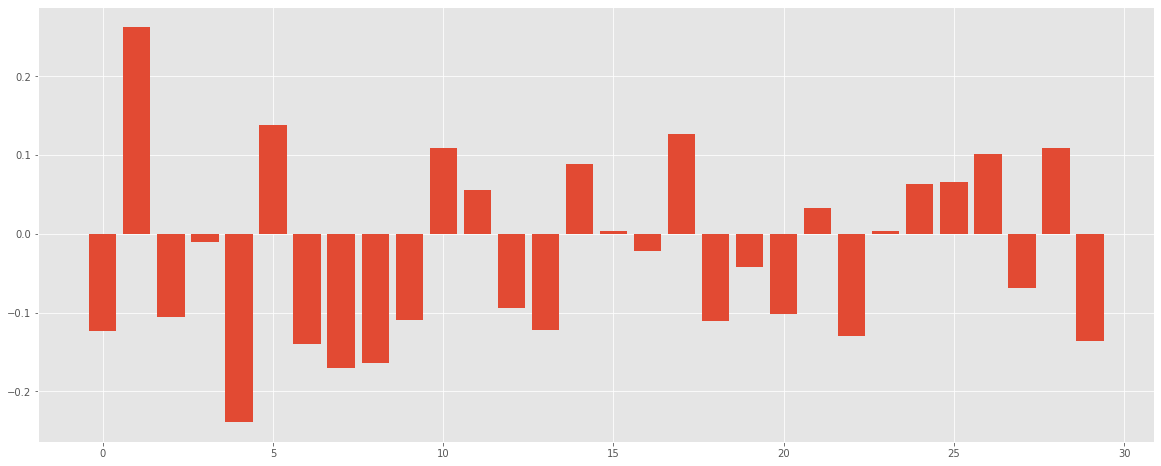

In [285]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get importance
importance = log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

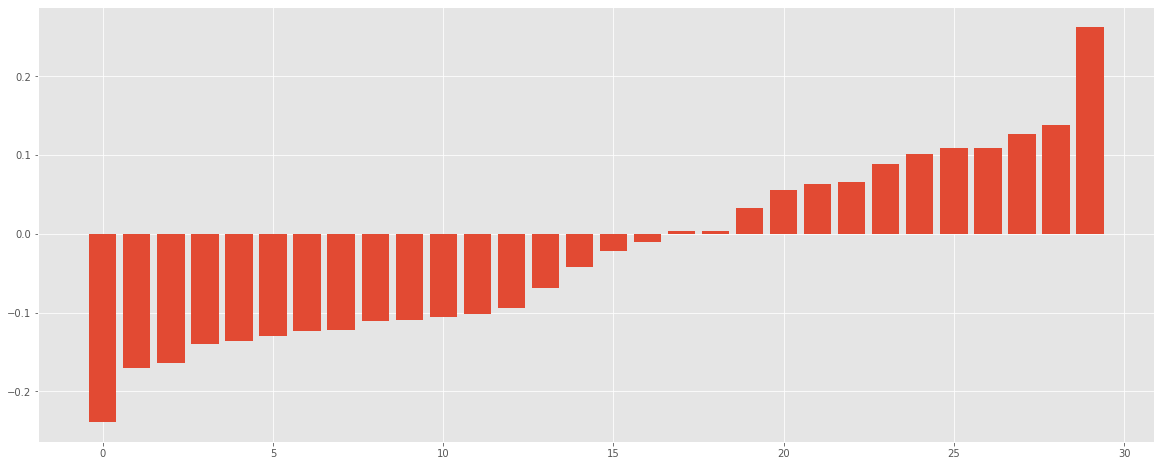

In [286]:
importance=log_reg.coef_[0]
importance=np.sort(importance)
importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [287]:
importance=log_reg.coef_[0]

In [288]:
names = list(X_rez.columns)


In [289]:
sorted(list(zip(names, importance)), key = lambda x: x[1])

[('Months at current employer', -0.23881042167392777),
 ('Borrower income', -0.16961400839666502),
 ('Borrower liabilities', -0.16410696595059257),
 ('Family liabilities', -0.13959020963320845),
 ('Residential status_nuosavas', -0.1365705836430631),
 ('Purpose_medicininėms išlaidoms', -0.13004050313139925),
 ('Loan amount', -0.12266650741627835),
 ('Education_pagrindinis', -0.12247098622363384),
 ('Marital status_susituokęs(-usi)', -0.11111109900792077),
 ('Gender_moteris', -0.10914438486110985),
 ('Birth year', -0.10538271073695939),
 ('Purpose_automobiliui', -0.1015869324994379),
 ('Education_magistras', -0.09440467790114256),
 ('Residential status_kita', -0.06857240879284626),
 ('Purpose_atostogoms', -0.04174822482958087),
 ('Marital status_kita', -0.021254599438209808),
 ('Children', -0.009823343422950841),
 ('Purpose_namų remontui', 0.003475613811987316),
 ('Marital status_išsiskyręs(-usi)', 0.0038420655402377894),
 ('Purpose_kita', 0.03255104502912575),
 ('Education_aukštasis', 0

### Darome XGBOOST modelį oversampling

In [290]:
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [291]:
#Padarome train ir test setus
#_rez yra undersampling, _res oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

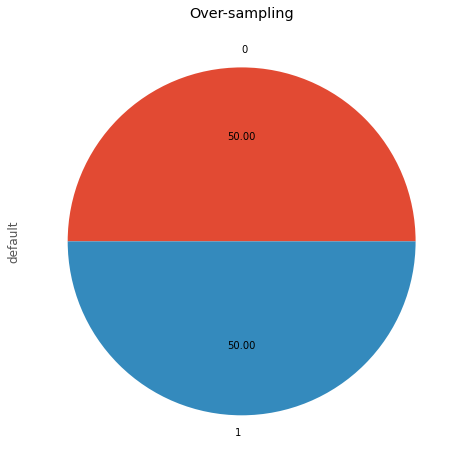

In [292]:
#Darome oversampling, padidinam minority dali
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority")
X_Train_res, y_Train_res = ros.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [293]:
X_train_scaled = scaler.fit_transform(X_Train_res)
x_test_scaled = scaler.transform(X_test)

In [294]:
#Sukuriame modelį
#model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model = XGBClassifier()

In [306]:
#Fitiname duomenis
model.fit(X_Train_res, y_Train_res)
#model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [307]:
#Gauname prognozes
y_pred = model.predict(x_test_scaled)

### XGBOOST rezultatai

In [308]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, y_pred)
print('Roc_Auc_Score: %f' % roc_auc_score)

Accuracy: 0.854561
Precision: 0.097674
Recall: 0.133758
F1 score: 0.112903
Roc_Auc_Score: 0.520951


<AxesSubplot:>

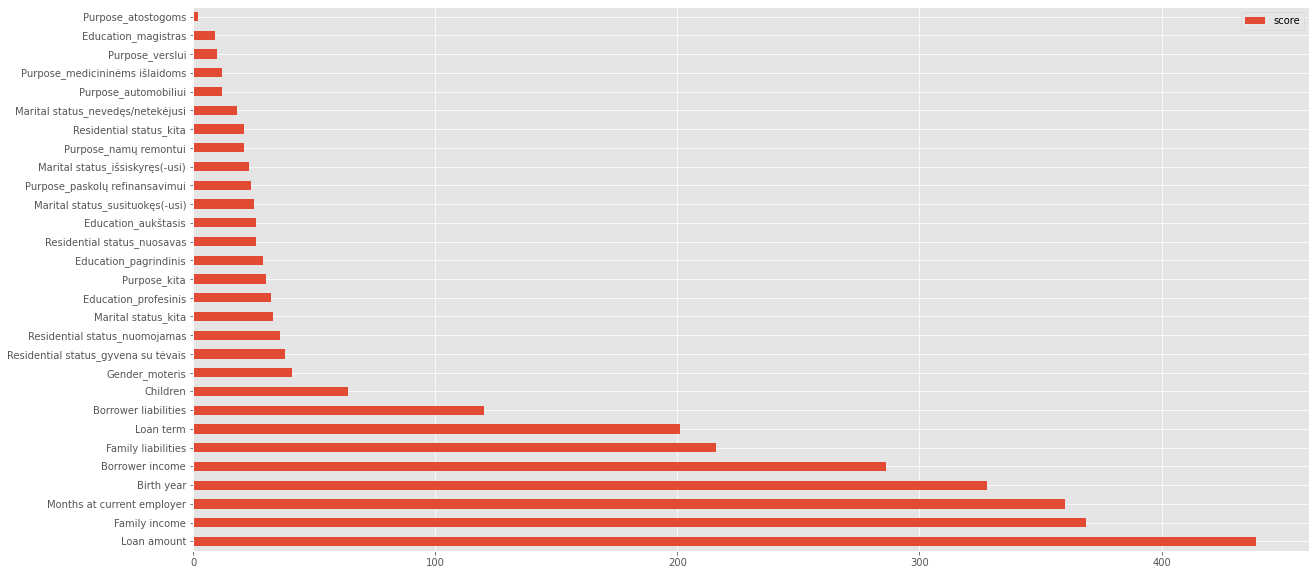

In [309]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

### Darome XGBOOST modelį undersampling

In [325]:
#Padarome train ir test setus
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

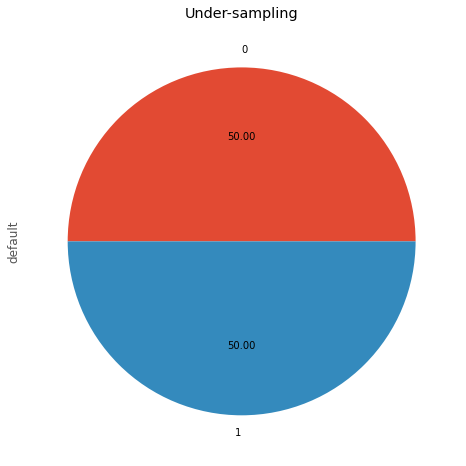

In [326]:
#Darome UnderSampler, pamazinam majority dali
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)
X_Train_res, y_Train_res = rus.fit_resample(X_train, y_train)
ax = y_rez.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [327]:
X_train_scaled = scaler.fit_transform(X_Train_res)
x_test_scaled = scaler.transform(X_test)
model = XGBClassifier()
model.fit(X_Train_res, y_Train_res)
y_pred = model.predict(x_test_scaled)

In [328]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, y_pred)
print('Roc_Auc_Score: %f' % roc_auc_score)

Accuracy: 0.706479
Precision: 0.075125
Recall: 0.286624
F1 score: 0.119048
Roc_Auc_Score: 0.512157


### Darome XGBoost Gridsearch

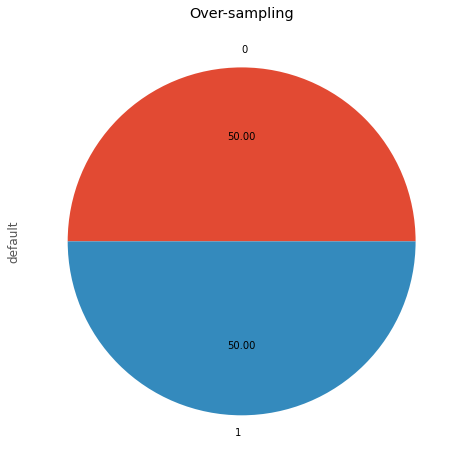

In [310]:
import xgboost as xgb
from sklearn.feature_selection import RFECV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

ros = RandomOverSampler(sampling_strategy = "not majority")
X_train, y_train = ros.fit_resample(X_train, y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

model = XGBClassifier()
rfe = RFECV(model, cv=3)
rfe = rfe.fit(X_train, y_train)

In [311]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['Loan amount', 'Loan term', 'Birth year', 'Children',
       'Months at current employer', 'Family income',
       'Family liabilities', 'Borrower income', 'Borrower liabilities',
       'Gender_moteris', 'Education_aukštasis', 'Education_magistras',
       'Education_pagrindinis', 'Education_profesinis',
       'Marital status_išsiskyręs(-usi)', 'Marital status_kita',
       'Marital status_nevedęs/netekėjusi',
       'Marital status_susituokęs(-usi)', 'Purpose_atostogoms',
       'Purpose_automobiliui', 'Purpose_kita',
       'Purpose_medicininėms išlaidoms', 'Purpose_namų remontui',
       'Purpose_paskolų refinansavimui', 'Purpose_verslui',
       'Residential status_gyvena su tėvais', 'Residential status_kita',
       'Residential status_nuomojamas', 'Residential status_nuosavas'],
      dtype=object)

In [312]:
ols_fit = model.fit(X_train[selected_features], y_train)

In [313]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train[selected_features], label=y_train)
dtest = xgb.DMatrix(X_test[selected_features], label=y_test)

In [314]:
param = {'max_depth': 2, 'eta': 0.1, 'objective': 'reg:squarederror'}
param['eval_metric'] = 'mae'
evallist = [(dtest,'test'),(dtrain, 'train')]

bst = xgb.train(param, dtrain, 30, evallist)

[0]	test-mae:0.49647	train-mae:0.49650
[1]	test-mae:0.49282	train-mae:0.49287
[2]	test-mae:0.48945	train-mae:0.48964
[3]	test-mae:0.48587	train-mae:0.48632
[4]	test-mae:0.48353	train-mae:0.48353
[5]	test-mae:0.48032	train-mae:0.48042
[6]	test-mae:0.47755	train-mae:0.47761
[7]	test-mae:0.47497	train-mae:0.47514
[8]	test-mae:0.47329	train-mae:0.47304
[9]	test-mae:0.47058	train-mae:0.47037
[10]	test-mae:0.46824	train-mae:0.46794
[11]	test-mae:0.46614	train-mae:0.46577
[12]	test-mae:0.46398	train-mae:0.46340
[13]	test-mae:0.46175	train-mae:0.46111
[14]	test-mae:0.46010	train-mae:0.45949
[15]	test-mae:0.45812	train-mae:0.45700
[16]	test-mae:0.45619	train-mae:0.45506
[17]	test-mae:0.45501	train-mae:0.45374
[18]	test-mae:0.45314	train-mae:0.45185
[19]	test-mae:0.45164	train-mae:0.45048
[20]	test-mae:0.45041	train-mae:0.44915
[21]	test-mae:0.44876	train-mae:0.44706
[22]	test-mae:0.44699	train-mae:0.44533
[23]	test-mae:0.44563	train-mae:0.44414
[24]	test-mae:0.44465	train-mae:0.44305
[25]	test-

In [315]:
y_pred_xgboost = bst.predict(dtest)

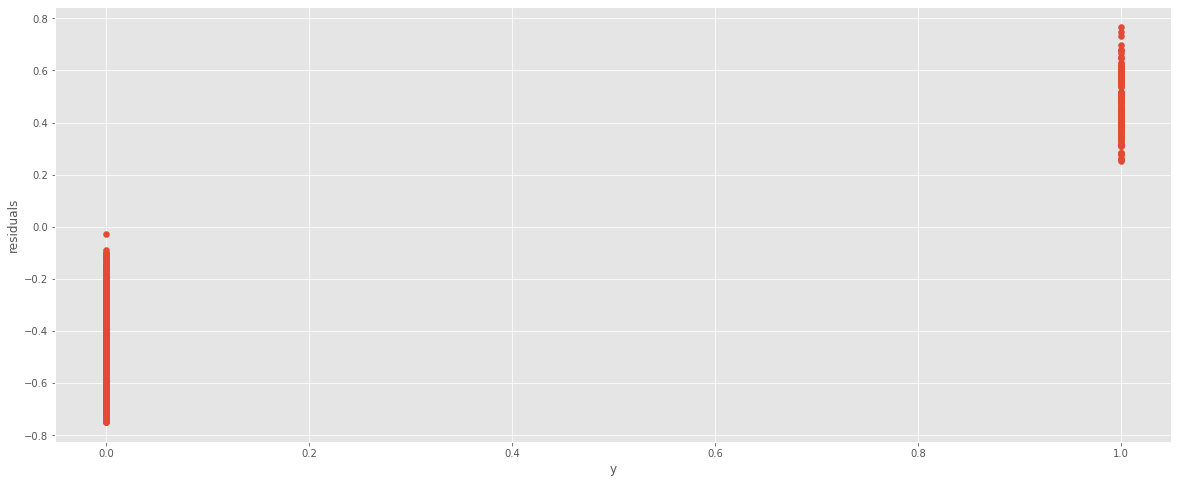

In [316]:
plt.scatter(y_test, y_test-y_pred_xgboost)
plt.xlabel("y")
plt.ylabel("residuals")
plt.show()

In [317]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.854561
Precision: 0.097674
Recall: 0.133758
F1 score: 0.112903


In [318]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {'objective': ['binary:hinge'],
              'learning_rate': [0.15, 0.2, 0.3, 0.4], 
              'max_depth': [4,6,8],
              'verbosity': [0],
              'n_estimators': [5, 10, 15, 20],
              }

bst = xgb.XGBClassifier()
best = GridSearchCV(bst, parameters, n_jobs=5, 
                   scoring="accuracy",
                   verbose=2, refit=True)

b_fit = best.fit(X_train[selected_features], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [319]:
#Geriausi parametrai XGBoostui
b_fit.best_params_


{'learning_rate': 0.4,
 'max_depth': 8,
 'n_estimators': 20,
 'objective': 'binary:hinge',
 'verbosity': 0}

In [320]:
best_params = {'learning_rate': 0.15,
 'max_depth': 4,
 'n_estimators': 5,
 'objective': 'binary:hinge',
 'verbosity': 0}

best_params['eval_metric'] = 'accuracy'

best_xg = xgb.train(b_fit.best_params_, dtrain, 50, evallist)

[0]	test-error:0.93081	train-error:0.50000
[1]	test-error:0.46011	train-error:0.23331
[2]	test-error:0.40899	train-error:0.20177
[3]	test-error:0.36536	train-error:0.17356
[4]	test-error:0.33275	train-error:0.15186
[5]	test-error:0.30322	train-error:0.13289
[6]	test-error:0.28162	train-error:0.11940
[7]	test-error:0.27545	train-error:0.11574
[8]	test-error:0.26311	train-error:0.10966
[9]	test-error:0.25518	train-error:0.10661
[10]	test-error:0.24769	train-error:0.10114
[11]	test-error:0.23402	train-error:0.09201
[12]	test-error:0.21287	train-error:0.08196
[13]	test-error:0.21551	train-error:0.07963
[14]	test-error:0.20714	train-error:0.07324
[15]	test-error:0.20009	train-error:0.06462
[16]	test-error:0.17629	train-error:0.05529
[17]	test-error:0.16483	train-error:0.04991
[18]	test-error:0.16263	train-error:0.04443
[19]	test-error:0.15646	train-error:0.03936
[20]	test-error:0.15425	train-error:0.03804
[21]	test-error:0.15029	train-error:0.03490
[22]	test-error:0.14015	train-error:0.0285

In [321]:
y_pred = best_xg.predict(dtest)

In [322]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [323]:
y_test

15841    0
17411    0
12407    0
16531    1
10764    0
        ..
12801    0
13811    0
12214    0
17099    0
15632    0
Name: default, Length: 2269, dtype: int64

In [324]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, y_pred)
print('Roc_Auc_Score: %f' % roc_auc_score)

Accuracy: 0.901278
Precision: 0.203540
Recall: 0.146497
F1 score: 0.170370
Roc_Auc_Score: 0.551942
